In [1]:
##implementing knn algorithm for classifier

In [2]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
## iris classfier from sklearn dataset

In [4]:
p1=np.array([1,2])
p2=np.array([2,4])


In [5]:
## distance between two poits

def distance(p1,p2):
    """Retorna la distancia que hay entre p1 y p2"""
    return np.sqrt(sum(np.power(p2-p1,2)))
    

In [6]:
distance(p1,p2)

2.23606797749979

In [7]:
## definimos la freciencia de aparicion de cada voto.
def majority_vote(votes):
    """Return the most common vote in the secuence"""
    vote_counts={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1
            
    winners=[]
    max_counts=max(vote_counts.values())
    for vote,count in vote_counts.items():
        if count==max_counts:
            winners.append(vote)
    
    return random.choice(winners)

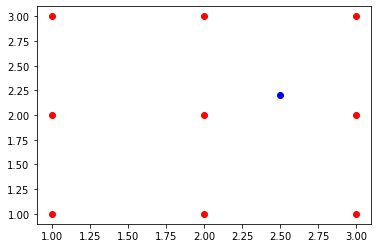

In [8]:
## encontrando los k vecinos más cercanos a p
# defining a set of points 
points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
plt.plot(points[:,0],points[:,1],"ro")
new_point=np.array([2.5,2.2])
plt.plot(new_point[0],new_point[1],"bo")
## la tarea es encontrar los k vecinos más cercanos al punto azul

In [13]:
#trabajando, calcular todas las distancias del punto azul con respecto al resto

distances=np.zeros(points.shape[0])
distances

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
for i in range(len(points)):
    distances[i]=distance(new_point,points[i])
    

In [15]:
distances

array([1.92093727, 1.5132746 , 1.7       , 1.3       , 0.53851648,
       0.94339811, 1.3       , 0.53851648, 0.94339811])

In [16]:
# ya tenemos las distancias del punto  "new_point" con respecto a los otros, ahora escogemos solo los k más cercanos
#en numpy tenemos una opcion de ordenar valores de menor a mayor y devuelve una lista de los indices.
#argsort se llama la funcion
k_index=np.argsort(distances)
k_index

array([4, 7, 5, 8, 3, 6, 1, 2, 0], dtype=int64)

In [17]:
## todo est lo llevamos a una funcion


In [18]:
def find_nearest_neighbors(p,points,k=5):
    distances=np.zeros(points.shape[0])
    for i in range(len(points)):
        distances[i]=distance(p,points[i])
    k_index=np.argsort(distances)
    return k_index[:k]
    

In [21]:
#retornamos los vecinos más cercanos
find_nearest_neighbors(new_point,points,k=3)

array([4, 7, 5], dtype=int64)

In [210]:
## ya tenemos los vecinos más cercanos de un punto sobre el resto del set de datos, ahora queda definir el predictor de "new_point", para saber a que grupo o clase pertenece
# en MLS, siempre habrá un feature y un target para cada feature.. tenemos el feature, ahora definimos un target para cada feature, esta definírá a qué 
#clase pertenecen cada una de ellas

In [22]:
points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
outcomes=np.array([0,0,0,0,1,1,1,1,1])

new_point

array([2.5, 2.2])

In [212]:
## como arquitectura de MLS quedaría así: 
features=points
target=outcomes
features,target

(array([[1, 1],
        [1, 2],
        [1, 3],
        [2, 1],
        [2, 2],
        [2, 3],
        [3, 1],
        [3, 2],
        [3, 3]]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1]))

In [24]:
## quedamos listos para definir nuestro predictor

def knn_predict(p,points,outcome,k=5):
    #encontramos los indices de los k vecimos más cercanos para p
    k_neighbors=find_nearest_neighbors(p,points,k)
    print(k_neighbors)
    return majority_vote(outcome[k_neighbors])
    

In [26]:
knn_predict(new_point,points,outcomes)

[4 7 5 8 3]


1

Text(0, 0.5, 'x2')

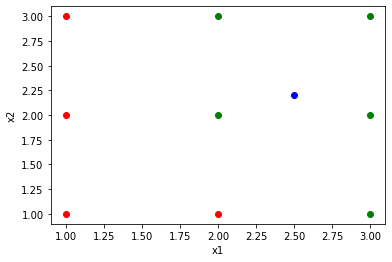

In [221]:
##refactoring our points plot
plt.figure()
plt.plot(points[:4,0],points[:4,1],"ro") ## target 0 (rojo)
plt.plot(points[4:,0],points[4:,1],"go") ## target 1 (verde)
plt.plot(new_point[0],new_point[1],"bo") ## new point
plt.xlabel("x1")
plt.ylabel("x2")

In [25]:
##notoriamente podemosver que el punto azul "new_point" esta dentro de la clase verde: DEMOSTREMOS
knn_predict(new_point,points,outcomes)

[4 7 5 8 3]


1

In [223]:
## como vemos, la clasificacion lo hizo correctamente

In [224]:
#####   OTRO EJEMPLO    #####

Text(0, 0.5, 'x2')

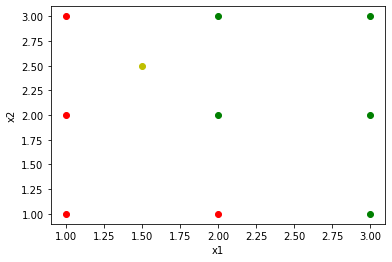

In [230]:
new_second_point=np.array([1.5,2.5])
#GRAFICAMOS
plt.figure()
plt.plot(points[:4,0],points[:4,1],"ro") ## target 0 (rojo)
plt.plot(points[4:,0],points[4:,1],"go") ## target 1 (verde)
plt.plot(new_second_point[0],new_second_point[1],"yo") ## new SECOND point
plt.xlabel("x1")
plt.ylabel("x2")


In [231]:
##predecimos a qué clase(target) puede pertenecer
knn_predict(new_second_point,points,outcomes)

0

In [232]:
##como se veía esperar, el resultado es el grupo cero.